<a href="https://colab.research.google.com/github/FMML20220102-PervezShaik/Weekly-Assignments/blob/main/Copy_of_FMML_Module4_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent
### Module Coordinator: Jashn Arora

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation} 
\begin{equation} y_1= 3 \end{equation} 

and also add some noise to the data.

In [78]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

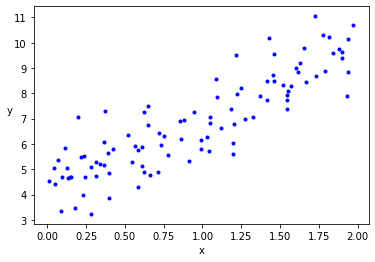

In [44]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2 
\end{equation}

In [45]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds 
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [46]:
def gradient_descent(X, y, y_pred, learning_rate, iterations):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations,2))
    
    for it in range(iterations):    
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)
        
    return y_pred, cost_history, y_pred_history    

Let's do 1000 iterations with a learning rate of 0.01. 
We will start with a random prediction.

In [47]:
lr = 0.05
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.215
y_pred[1]: 2.770
Final error: 4032.923


In [48]:
y.shape

(100, 1)

Plotting the error vs Number of iterations

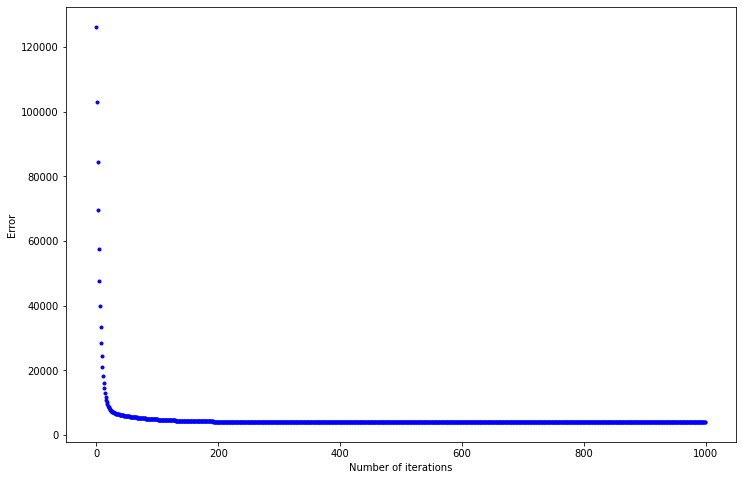

In [49]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

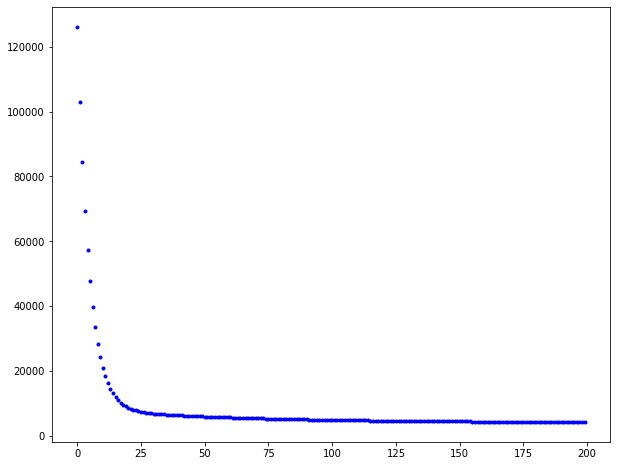

In [50]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [51]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.05, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [52]:
lr = 0.5
n_iter = 200
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.223
y_pred[1]: 2.794
Final error: 42.918


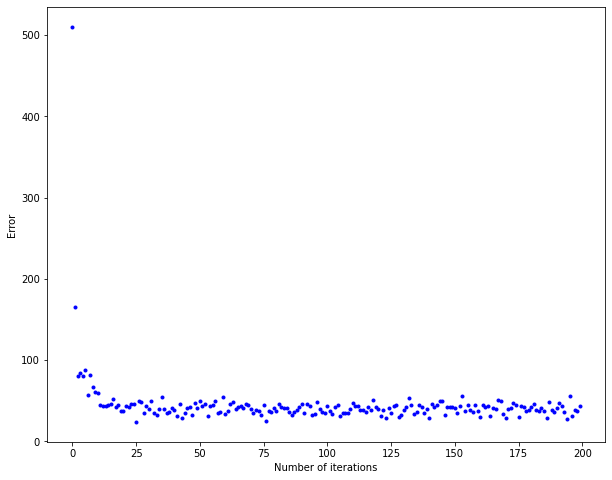

In [53]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [79]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.05, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [55]:
lr = 0.1
n_iter = 200
batch_size=20
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter,batch_size)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.179
y_pred[1]: 2.802
Final error: 805.579


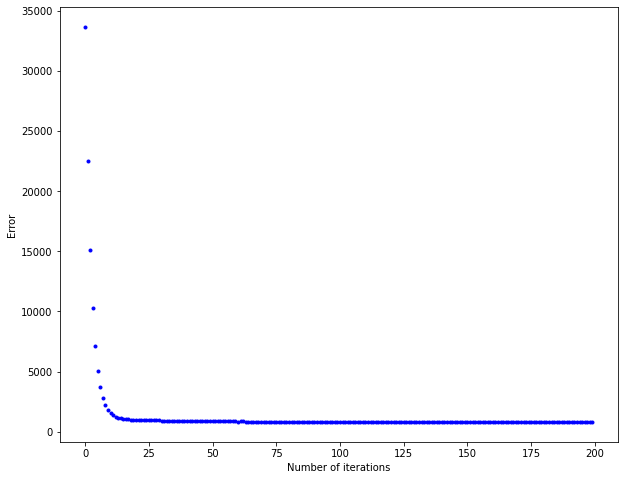

In [56]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

0 : for batch size = 10
y_pred[0]: 3.176
y_pred[1]: 3.594
Final error: 461.000
1 : for batch size = 17
y_pred[0]: 3.865
y_pred[1]: 3.050
Final error: 738.011
2 : for batch size = 23
y_pred[0]: 3.181
y_pred[1]: 3.589
Final error: 994.744
3 : for batch size = 29
y_pred[0]: 3.366
y_pred[1]: 3.444
Final error: 1210.309
4 : for batch size = 37
y_pred[0]: 2.984
y_pred[1]: 3.745
Final error: 1676.342


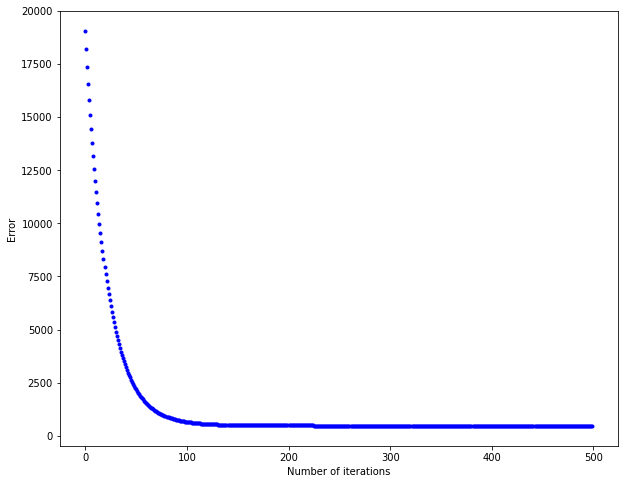

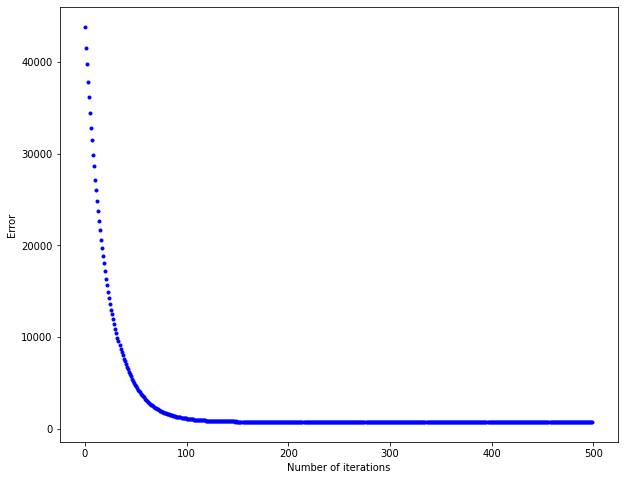

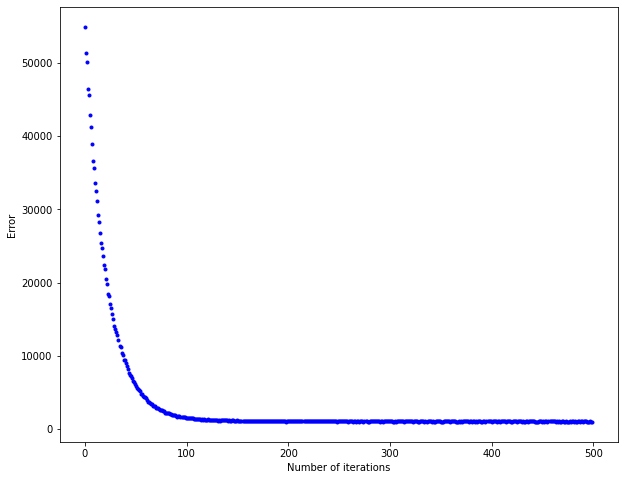

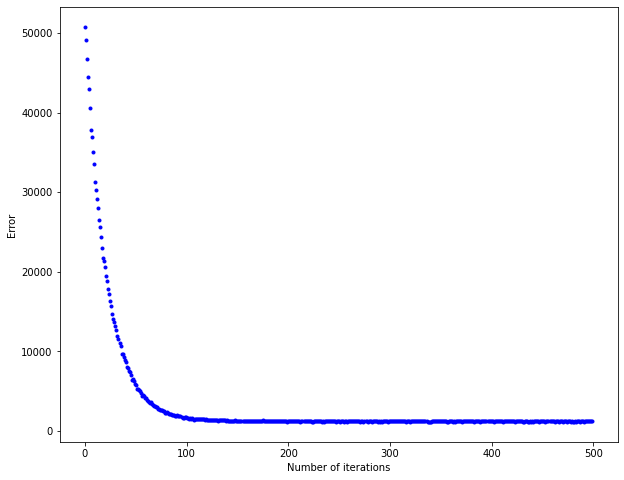

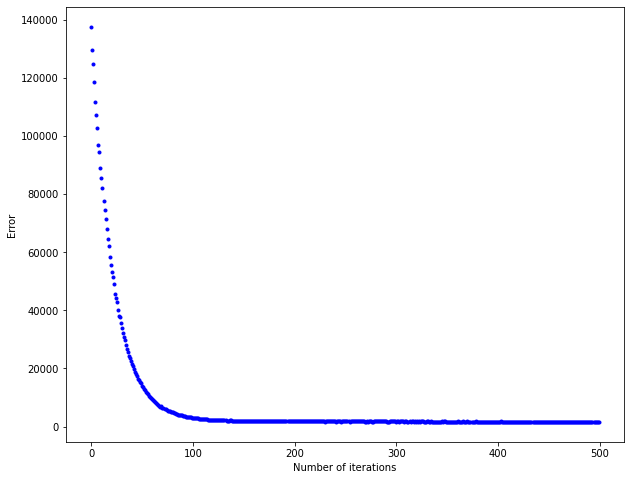

In [80]:
#1ans:
lr=0.01
n_iter=500
batch_size_list=[10,17,23,29,37]
for i,batch_size in enumerate(batch_size_list):

     y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter,batch_size)

     print(str(i)+' : for batch size = '+str(batch_size))
     print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
     print('Final error: {:0.3f}'.format(cost_history[-1]))    
     fig, ax = plt.subplots(figsize=(10,8))
     ax.set_ylabel('Error')
     ax.set_xlabel('Number of iterations' )
     y_pred = np.random.randn(2,1)   
     ax.plot(range(n_iter), cost_history, 'b.')

In [58]:
#3ans:
lr=0.01
y_pred_1, cost_history_1, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)
y_pred_2, cost_history_2 = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)
y_pred_3, cost_history_3 = minibatch_gradient_descent(X, y, y_pred, lr, n_iter,batch_size)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_1[0][0], y_pred_1[1][0]))
print('Final error: {:0.3f}'.format(cost_history_1[-1]))

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_2[0][0], y_pred_2[1][0]))
print('Final error: {:0.3f}'.format(cost_history_2[-1]))

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_3[0][0], y_pred_3[1][0]))
print('Final error: {:0.3f}'.format(cost_history_3[-1]))


y_pred[0]: 4.010
y_pred[1]: 2.951
Final error: 4096.487
y_pred[0]: 4.006
y_pred[1]: 2.961
Final error: 36.201
y_pred[0]: 4.010
y_pred[1]: 2.951
Final error: 1393.843


In [59]:
lr=0.09
y_pred_1, cost_history_1, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)
y_pred_2, cost_history_2 = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)
y_pred_3, cost_history_3 = minibatch_gradient_descent(X, y, y_pred, lr, n_iter,batch_size)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_1[0][0], y_pred_1[1][0]))
print('Final error: {:0.3f}'.format(cost_history_1[-1]))

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_2[0][0], y_pred_2[1][0]))
print('Final error: {:0.3f}'.format(cost_history_2[-1]))

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred_3[0][0], y_pred_3[1][0]))
print('Final error: {:0.3f}'.format(cost_history_3[-1]))

y_pred[0]: 4.215
y_pred[1]: 2.770
Final error: 4032.923
y_pred[0]: 4.221
y_pred[1]: 2.811
Final error: 41.126
y_pred[0]: 4.214
y_pred[1]: 2.769
Final error: 1366.547


Hence,We observe that as LR is increased from 0.01 to 0.09,There is a significant change in final error and predicted values.

In [60]:
from google.colab import files

In [61]:
#we have taken dataset of health Insurance

In [62]:
sample=files.upload()

Saving insurance.csv to insurance (1).csv


In [63]:
import pandas as pd
sample_data=pd.read_csv("insurance.csv")
sample_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [82]:
#here,we represent column elemnets in numerical form
c2=sample_data['sex'].replace('female',-1)
c2_1=c2.replace('male',1)
c5=sample_data['smoker'].replace('yes',1)
c5_1=c5.replace('no',0)
c6=sample_data['region'].replace("southwest",-1)
c6_1=c6.replace('southeast',-2)
c6_2=c6_1.replace('northeast',2)
c6_3=c6_2.replace('northwest',1)

In [83]:
sample_data.drop('sex',axis=1)
sample_data.drop('smoker',axis=1)
sample_data.drop('region',axis=1)
sample_data['sex']=c2_1
sample_data['smoker']=c5_1
sample_data['region']=c6_3

In [84]:
sample_data

,age,sex,bmi,children,smoker,region,charges
0,19,-1,27.900,0,1,-1,16884.92400
1,18,1,33.770,1,0,-2,1725.55230
2,28,1,33.000,3,0,-2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,-1,31.920,0,0,2,2205.98080
1335,18,-1,36.850,0,0,-2,1629.83350
1336,21,-1,25.800,0,0,-1,2007.94500


In [85]:
y_1=sample_data['charges']
X_r=sample_data.drop("charges",axis=1)

In [86]:
X_arr=np.array(X_r)
X_barr = np.c_[np.ones((len(X_arr), 1)), X_arr]
y_arr=np.array(y_1)
y_rs=y_arr.reshape(1338,1)


In [87]:
#stochastic gradien descent
y_pred=np.random.randn(7,1)
lr=0.02
n_iter=700
y_pred, cost_history, = stocashtic_gradient_descent(X_barr, y_rs, y_pred, lr, n_iter)
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))


y_pred[0]: -3563.160
y_pred[1]: 211.344
Final error: 24888607293.296


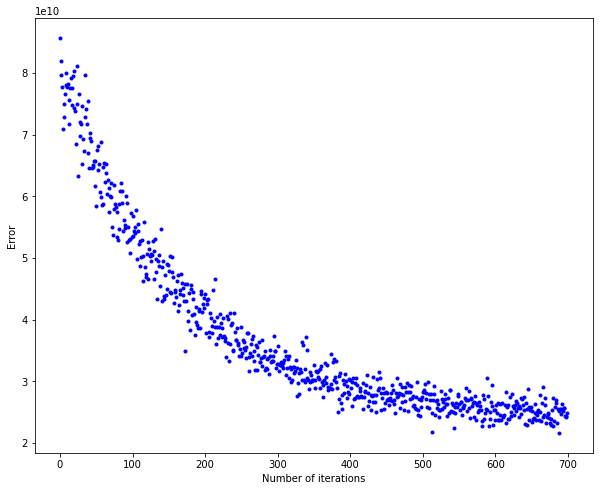

In [88]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')